In [21]:
# Poisson problem on a unit square with Dirichlet boundary conditions
# Manufactured solution.

import numpy as np
import eztfem as ezt
from func import func
from scipy.sparse.linalg import spsolve

In [22]:
# create mesh

print('mesh')
mesh = ezt.quadrilateral2d([20, 20], 'quad9')

mesh
rectangle_quad9


In [23]:
# define the problem

print('problem_definition')
elementdof = np.array([[2, 2, 2, 2, 2, 2, 2, 2, 2],
                       [1, 0, 1, 0, 1, 0, 1, 0, 0],
                       [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int).transpose()
problem = ezt.Problem(mesh, elementdof, nphysq=2)

problem_definition


In [24]:
# define Gauss integration and basis functions

user = ezt.User()
shape = 'quad'

print('gauss_legendre')
user.xr, user.wg = ezt.gauss_legendre(shape, n=3)

print('basis_function phi')
user.phi, user.dphi = ezt.basis_function(shape, 'Q2', user.xr)

print('basis_function psi')
user.psi, _ = ezt.basis_function(shape, 'Q1', user.xr)

gauss_legendre
basis_function phi
basis_function psi


In [25]:
# user struct for setting problem coefficients, ...

user.coorsys = 0
user.mu = 1
user.funcnr = 0
user.func = func  # not used when funcnr == 0

In [26]:
# assemble the system matrix and vector

print('build_system')
A, f = ezt.build_system(mesh, problem, ezt.stokes_elem, user)

build_system


In [27]:
# define essential boundary conditions (Dirichlet)

print('define_essential')
iess = ezt.define_essential(mesh, problem, 'curves', [0, 1, 2, 3], degfd=0)
iess = ezt.define_essential(mesh, problem, 'curves', [0, 1, 2, 3], degfd=1,
                            iessp=iess)
iess = ezt.define_essential(mesh, problem, 'points', [0], physq=1,
                            iessp=iess)


define_essential


In [28]:
# fill values for the essential boundary conditions

print('fill_system_vector')
uess = ezt.fill_system_vector(mesh, problem, 'curves', [2], func, funcnr=5)

# apply essential boundary conditions to the system

print('apply_essential')
ezt.apply_essential(A, f, uess, iess)

fill_system_vector
apply_essential


In [29]:
# solve the system

print('solve')
u = spsolve(A.tocsr(), f)

solve


In [30]:
# Pressure in all nodes for plotting

print('pressure in nodes')
xr = ezt.refcoor_nodal_points(mesh)
user.psi, _ = ezt.basis_function('quad', 'Q1', xr)
user.u = u
pressure = ezt.deriv_vector(mesh, problem, ezt.stokes_pressure, user)

pressure in nodes


In [31]:
# derivatives of the velocity

print('velocity derivatives')
xr = ezt.refcoor_nodal_points(mesh)
user.phi, user.dphi = ezt.basis_function('quad', 'Q2', xr)
user.u = u

user.comp = 0  # dudx
dudx = ezt.deriv_vector(mesh, problem, ezt.stokes_deriv, user)
user.comp = 1  # dudy
dudy = ezt.deriv_vector(mesh, problem, ezt.stokes_deriv, user)
user.comp = 2  # dvdx
dvdx = ezt.deriv_vector(mesh, problem, ezt.stokes_deriv, user)
user.comp = 3  # dvdy
dvdy = ezt.deriv_vector(mesh, problem, ezt.stokes_deriv, user)
user.comp = 4  # dvdx - dudy = vorticity
omega = ezt.deriv_vector(mesh, problem, ezt.stokes_deriv, user)
user.comp = 6  # divu, divergence of the velocity field
divu = ezt.deriv_vector(mesh, problem, ezt.stokes_deriv, user)
user.comp = 7  # gammadot, effective strain rate = sqrt(2II_D)
gammadot = ezt.deriv_vector(mesh, problem, ezt.stokes_deriv, user)

print(max(omega.u))

velocity derivatives
25.865650243176034


In [32]:
mesh_pv = ezt.generate_pyvista_mesh(mesh)
ezt.plot_mesh_pv(mesh_pv, show_edges=True, window_size=(800, 400))

Widget(value='<iframe src="http://localhost:54368/index.html?ui=P_0x15fb54800_7&reconnect=auto" class="pyvista…

In [33]:
ezt.plot_sol(mesh_pv, problem, u, show_scalar_bar=True, n_colors=16,
             window_size=(800, 400), physq=0, degfd=0)

Widget(value='<iframe src="http://localhost:54368/index.html?ui=P_0x136a6e570_8&reconnect=auto" class="pyvista…

In [34]:
ezt.plot_sol_contour(mesh_pv, problem, u, physq=0, degfd=1, nlevels=20)

Widget(value='<iframe src="http://localhost:54368/index.html?ui=P_0x32642c560_9&reconnect=auto" class="pyvista…

In [35]:
ezt.plot_quiver(mesh_pv, problem, u, show_scalar_bar=True, n_colors=16,
                window_size=(800, 400), physq=0, degfd=0)

Widget(value='<iframe src="http://localhost:54368/index.html?ui=P_0x32642d460_10&reconnect=auto" class="pyvist…

In [36]:
ezt.plot_vector(mesh_pv, problem, gammadot)

Widget(value='<iframe src="http://localhost:54368/index.html?ui=P_0x32642b830_11&reconnect=auto" class="pyvist…

In [37]:
ezt.plot_vector_contours(mesh_pv, problem, gammadot, nlevels=8)

Widget(value='<iframe src="http://localhost:54368/index.html?ui=P_0x32642aed0_12&reconnect=auto" class="pyvist…

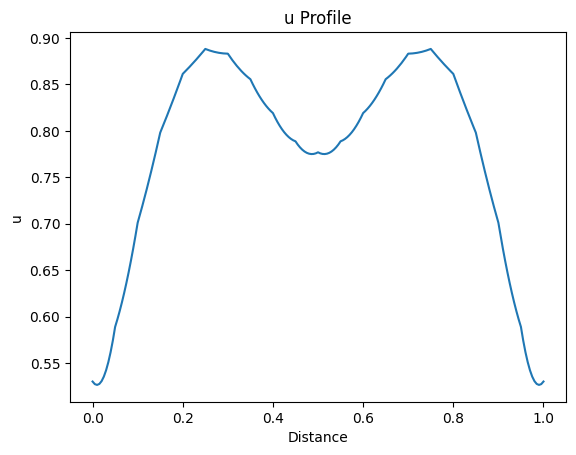

In [40]:
points = [[0.0, 0.3, 0.0], [1.0, 0.3, 0.0]]
_ = ezt.plot_vector_over_line(mesh_pv, problem, gammadot, points,
                              plot_mesh=False)